In [4]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

In [5]:
from yt_dlp import YoutubeDL

def download_video(url, output_path=None):
    ydl_opts = {
        'format': 'best',  # Download best quality
        'outtmpl': output_path if output_path else '%(title)s.%(ext)s'
    }
    
    try:
        with YoutubeDL(ydl_opts) as ydl:
            ydl.download([url])
    except Exception as e:
        print(f"Error downloading video: {e}")

# Example usage:
url = "https://www.youtube.com/watch?v=atTsXki5nHs&t=618sL"
download_video(url, "output_video.mp4")

[youtube] Extracting URL: https://www.youtube.com/watch?v=atTsXki5nHs&t=618sL
[youtube] atTsXki5nHs: Downloading webpage
[youtube] atTsXki5nHs: Downloading ios player API JSON
[youtube] atTsXki5nHs: Downloading mweb player API JSON
[youtube] atTsXki5nHs: Downloading player a8476471
[youtube] atTsXki5nHs: Downloading m3u8 information
[info] atTsXki5nHs: Downloading 1 format(s): 18
[download] Destination: output_video.mp4
[download] 100% of   86.19MiB in 00:00:05 at 15.61MiB/s    


In [8]:
video_path = "output_video.mp4"
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break

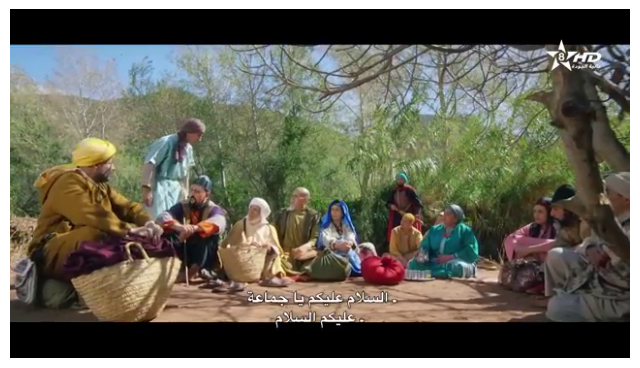

In [9]:
# Set frame position to 10:03 (603 seconds)
target_time = 867  # seconds
target_frame = int(target_time * fps)
cap.set(cv2.CAP_PROP_POS_FRAMES, target_frame)

ret, frame = cap.read()


plt.figure(figsize=(8,5))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [20]:
# Save frame as image
cv2.imwrite('frame1.jpg', frame)

True

In [53]:
frame = cv2.imread('frame.jpg')


In [ ]:
def display_frame_info(image_path):
    """
    Display frame with coordinates and allow mouse interaction
    """
    # Read the image
    frame = cv2.imread(image_path)
    if frame is None:
        print("Error loading image")
        return
    
    # Get image dimensions
    height, width = frame.shape[:2]
    print(f"Image dimensions: Width={width}, Height={height}")
    
    # Create a window and set mouse callback
    def mouse_callback(event, x, y, flags, param):
        if event == cv2.EVENT_MOUSEMOVE:
            # Create a copy of the original frame
            img_copy = frame.copy()
            # Draw current coordinates
            cv2.putText(img_copy, f'(x={x}, y={y})', (x, y), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            cv2.imshow('Frame', img_copy)
    
    cv2.imshow('Frame', frame)
    cv2.setMouseCallback('Frame', mouse_callback)
    
    print("Move mouse over image to see coordinates. Press 'q' to quit.")
    while True:
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cv2.destroyAllWindows()
    return frame

display_frame_info('frame.jpg')


In [15]:
def select_subtitle_region(image_path):
    """
    Allow user to select subtitle region and return coordinates
    """
    frame = cv2.imread(image_path)
    if frame is None:
        print("Error loading image")
        return
    
    # Global variables for rectangle selection
    rect_coords = []
    drawing = False
    
    def mouse_callback(event, x, y, flags, param):
        nonlocal drawing, rect_coords
        
        if event == cv2.EVENT_LBUTTONDOWN:
            drawing = True
            rect_coords = [(x, y)]
            
        elif event == cv2.EVENT_MOUSEMOVE:
            if drawing:
                img_copy = frame.copy()
                cv2.rectangle(img_copy, rect_coords[0], (x, y), (0, 255, 0), 2)
                cv2.imshow('Select Region', img_copy)
                
        elif event == cv2.EVENT_LBUTTONUP:
            drawing = False
            rect_coords.append((x, y))
            cv2.rectangle(frame, rect_coords[0], rect_coords[1], (0, 255, 0), 2)
            cv2.imshow('Select Region', frame)
    
    cv2.imshow('Select Region', frame)
    cv2.setMouseCallback('Select Region', mouse_callback)
    
    print("Click and drag to select subtitle region. Press 'q' when done.")
    while True:
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cv2.destroyAllWindows()
    
    if len(rect_coords) == 2:
        x1, y1 = rect_coords[0]
        x2, y2 = rect_coords[1]
        # Return x, y, width, height
        return (min(x1, x2), min(y1, y2), 
                abs(x2 - x1), abs(y2 - y1))
    return None

In [16]:
def verify_subtitle_region(image_path, coords):
    """
    Display the selected region for verification
    """
    frame = cv2.imread(image_path)
    if frame is None or coords is None:
        return
    
    x, y, w, h = coords
    
    # Draw rectangle around selected region
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # Extract and display the region
    subtitle_region = frame[y:y+h, x:x+w]
    
    # Display both images
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title('Full Frame with Selected Region')
    
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(subtitle_region, cv2.COLOR_BGR2RGB))
    plt.title('Extracted Subtitle Region')
    
    plt.show()
    
    return subtitle_region

First, let's look at the frame dimensions and coordinates:
Image dimensions: Width=640, Height=360
Move mouse over image to see coordinates. Press 'q' to quit.

Now, let's select the subtitle region:
Click and drag to select subtitle region. Press 'q' when done.

Selected coordinates (x, y, width, height): (102, 276, 460, 62)

Verifying selected region:


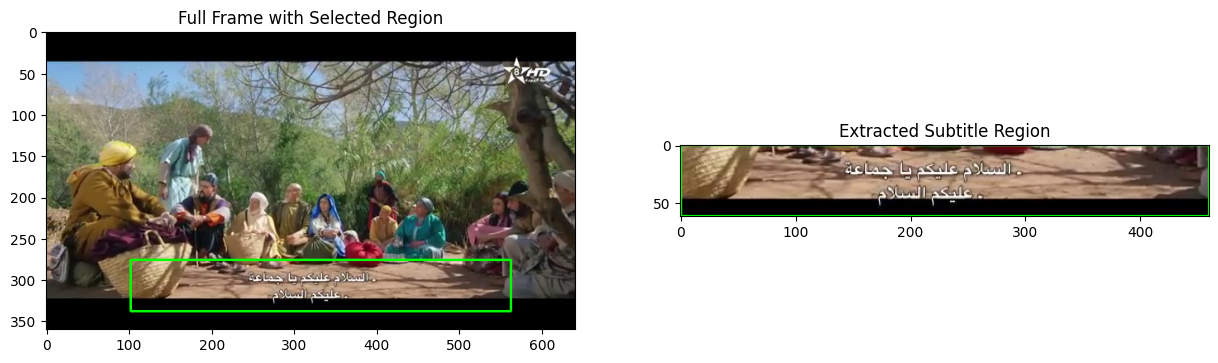

In [21]:
image_path = 'frame1.jpg'

# First, display frame info and coordinates
print("First, let's look at the frame dimensions and coordinates:")
frame = display_frame_info(image_path)

# Then select the subtitle region
print("\nNow, let's select the subtitle region:")
coords = select_subtitle_region(image_path)

if coords:
    print(f"\nSelected coordinates (x, y, width, height): {coords}")
    
    # Verify the selection
    print("\nVerifying selected region:")
    subtitle_region = verify_subtitle_region(image_path, coords)
    
    # Save coordinates for future use
    with open('subtitle_coords.txt', 'w') as f:
        f.write(','.join(map(str, coords)))
else:
    print("No region selected")

In [72]:
def extract_subtitle_region(frame, coords):
    """
    Extract the subtitle region and preprocess it for OCR
    """
    # Extract region of interest (ROI)
    x, y, w, h = coords
    subtitle_region = frame[y:y+h, x:x+w]

    return subtitle_region

In [69]:
frame = cv2.imread('frame1.jpg')

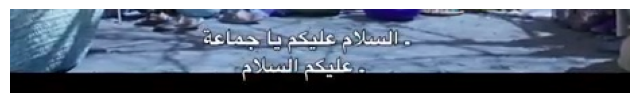

In [73]:
coords = (102, 276, 460, 62)
clean_frame = extract_subtitle_region(frame, coords)
plt.figure(figsize=(8,5))
plt.imshow(clean_frame, cmap='gray')
plt.axis('off')
plt.show()

In [87]:
cv2.imwrite('clean_frame.jpg', clean_frame)

True

In [92]:
import pysrt
import moviepy as mp
from pydub import AudioSegment
import os

def parse_srt(srt_path):
    """
    Parse SRT file and return list of subtitle entries with timestamps
    """
    subs = pysrt.open(srt_path)
    subtitle_data = []
    
    for sub in subs:
        # Convert timestamps to seconds
        start_time = sub.start.hours * 3600 + sub.start.minutes * 60 + sub.start.seconds + sub.start.milliseconds / 1000
        end_time = sub.end.hours * 3600 + sub.end.minutes * 60 + sub.end.seconds + sub.end.milliseconds / 1000
        
        subtitle_data.append({
            'text': sub.text.strip(),
            'start_time': start_time,
            'end_time': end_time,
            'duration': end_time - start_time
        })
    
    return subtitle_data

subtitle_data = parse_srt('output_video.srt')
print(subtitle_data)



[{'text': 'هيا', 'start_time': 20.75, 'end_time': 21.75, 'duration': 1.0}, {'text': 'ارفع يديك فوق رأسك يا قاضي', 'start_time': 23.5, 'end_time': 25.75, 'duration': 2.25}, {'text': 'اجمعوا كل الذين قبضتم عليهم و أحضروهم\nوسط البلدة لأريهم كيف سارد لهم جميلهم', 'start_time': 26.75, 'end_time': 32.75, 'duration': 6.0}, {'text': 'غدا إن شاء الله سنستيقظ\nفي\nالفجر', 'start_time': 38.0, 'end_time': 40.5, 'duration': 2.5}, {'text': 'سنقتادكم جميعا إلى مكان لتشهدوا على ما لا تتوقعون', 'start_time': 40.5, 'end_time': 45.5, 'duration': 5.0}, {'text': 'و ما لم يكن يوما في حسبانكم بأنه سيصيبكم', 'start_time': 45.75, 'end_time': 49.75, 'duration': 4.0}, {'text': 'كيف لي أن أنقذكم؟', 'start_time': 66.75, 'end_time': 68.25, 'duration': 1.5}, {'text': 'عز علي أمركم لكن لا حيلة لي', 'start_time': 68.75, 'end_time': 72.25, 'duration': 3.5}, {'text': 'هذا ما كنت أقوله دائما لن ننعم بالهناء يوما', 'start_time': 73.0, 'end_time': 76.5, 'duration': 3.5}, {'text': 'سيدتي تيهيا، أنت,\nطوق النجاة', 'start_ti

In [93]:
def extract_audio_segments(video_path, subtitle_data, output_dir="audio_segments"):
    """
    Extract audio segments corresponding to each subtitle
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Extract audio from video
    video = mp.VideoFileClip(video_path)
    audio = video.audio
    
    # Save full audio temporarily
    temp_audio_path = "temp_audio.wav"
    audio.write_audiofile(temp_audio_path)
    
    # Load audio file using pydub
    full_audio = AudioSegment.from_wav(temp_audio_path)
    
    segments = []
    for idx, sub in enumerate(subtitle_data):
        # Convert timestamps to milliseconds
        start_ms = sub['start_time'] * 1000
        end_ms = sub['end_time'] * 1000
        
        # Extract segment
        segment = full_audio[start_ms:end_ms]
        
        # Generate output filename
        output_file = os.path.join(output_dir, f"segment_{idx:04d}.wav")
        
        # Export segment
        segment.export(output_file, format="wav")
        
        segments.append({
            'text': sub['text'],
            'audio_path': output_file,
            'start_time': sub['start_time'],
            'end_time': sub['end_time'],
            'duration': sub['duration']
        })
    
    # Cleanup
    os.remove(temp_audio_path)
    video.close()
    
    return segments

In [94]:
def create_dataset(segments, output_path="dataset.csv"):
    """
    Create a CSV file with audio paths and corresponding text
    """
    import pandas as pd
    
    df = pd.DataFrame(segments)
    df.to_csv(output_path, index=False)
    return df

In [95]:
def process_video_and_srt(video_path, srt_path, output_dir="dataset"):
    """
    Main function to process video and SRT file
    """
    # Parse SRT file
    print("Parsing SRT file...")
    subtitle_data = parse_srt(srt_path)
    
    # Extract audio segments
    print("Extracting audio segments...")
    segments = extract_audio_segments(video_path, subtitle_data, 
                                    output_dir=os.path.join(output_dir, "audio"))
    
    # Create dataset file
    print("Creating dataset file...")
    dataset = create_dataset(segments, 
                           output_path=os.path.join(output_dir, "dataset.csv"))
    
    return dataset

In [96]:
srt_path = 'output_video.srt'
dataset = process_video_and_srt(video_path, srt_path)

Parsing SRT file...
Extracting audio segments...
MoviePy - Writing audio in temp_audio.wav


MoviePy - Done.
Creating dataset file...


In [97]:
dataset.head()

,text,audio_path,start_time,end_time,duration
0,هيا,dataset\audio\segment_0000.wav,20.75,21.75,1.00
1,ارفع يديك فوق رأسك يا قاضي,dataset\audio\segment_0001.wav,23.50,25.75,2.25
2,اجمعوا كل الذين قبضتم عليهم و أحضروهم\nوسط الب...,dataset\audio\segment_0002.wav,26.75,32.75,6.00
3,غدا إن شاء الله سنستيقظ\nفي\nالفجر,dataset\audio\segment_0003.wav,38.00,40.50,2.50
4,سنقتادكم جميعا إلى مكان لتشهدوا على ما لا تتوقعون,dataset\audio\segment_0004.wav,40.50,45.50,5.00


In [98]:
def analyze_dataset(dataset):
    """
    Analyze the created dataset
    """
    stats = {
        'total_segments': len(dataset),
        'total_duration': dataset['duration'].sum(),
        'avg_segment_duration': dataset['duration'].mean(),
        'unique_characters': len(set(''.join(dataset['text']))),
        'total_characters': sum(len(text) for text in dataset['text']),
        'avg_text_length': sum(len(text) for text in dataset['text']) / len(dataset)
    }
    
    return stats
analyze_dataset(dataset)

{'total_segments': 310,
 'total_duration': np.float64(848.75),
 'avg_segment_duration': np.float64(2.7379032258064515),
 'unique_characters': 49,
 'total_characters': 9392,
 'avg_text_length': 30.296774193548387}

In [100]:
min(dataset['duration']), max(dataset['duration'])


(0.5, 9.0)

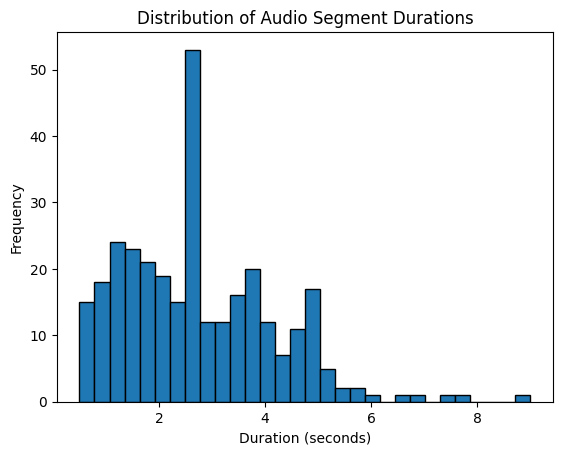

In [99]:
# distribution of audio segments duration
plt.hist(dataset['duration'], bins=30, edgecolor='black')
plt.title('Distribution of Audio Segment Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [102]:
import pandas as pd
import random
import pygame
import time
from IPython.display import display, clear_output  # If you're using Jupyter notebook

def play_random_segment(dataset_path="dataset/dataset.csv"):
    """
    Play a random audio segment and display its text
    """
    # Read the dataset
    df = pd.read_csv(dataset_path)
    
    # Select random row
    random_segment = df.sample(n=1).iloc[0]
    
    # Initialize pygame mixer
    pygame.mixer.init()
    pygame.mixer.music.load(random_segment['audio_path'])
    
    # Display information
    print("\n" + "="*50)
    print(f"Playing segment {random_segment['audio_path']}")
    print(f"Duration: {random_segment['duration']:.2f} seconds")
    print("\nText:")
    print("-"*50)
    print(random_segment['text'])
    print("="*50 + "\n")
    
    # Play audio
    pygame.mixer.music.play()
    
    # Wait for audio to finish
    time.sleep(random_segment['duration'])
    
    # Cleanup
    pygame.mixer.music.stop()
    pygame.mixer.quit()

def interactive_player(dataset_path="dataset/dataset.csv"):
    """
    Interactive player with controls
    """
    while True:
        play_random_segment(dataset_path)
        
        choice = input("\nPress:\n'r' for another random segment\n'q' to quit\n> ")
        if choice.lower() == 'q':
            break
        clear_output(wait=True)  # Clear previous output in Jupyter

interactive_player()


Playing segment dataset\audio\segment_0000.wav
Duration: 1.00 seconds

Text:
--------------------------------------------------
هيا



In [ ]:
def preprocess_audio_segment(segment):
    """
    Apply audio preprocessing
    """
    # Normalize audio
    normalized = segment.normalize()
    
    # Remove silence
    silence_thresh = -40  # dB
    trimmed = normalized.strip_silence(
        silence_thresh=silence_thresh,
        padding=100  # ms
    )
    
    return trimmed

In [103]:
def crop_video_segment(video_path, start_min=4, end_min=6, output_path="cropped_video.mp4"):
    """
    Crop a video segment between specified minutes
    
    Args:
        video_path (str): Path to input video file
        start_min (int): Start minute (default 4)
        end_min (int): End minute (default 6) 
        output_path (str): Path to save cropped video
    """
    try:
        # Convert minutes to seconds
        start_time = start_min * 60
        end_time = end_min * 60
        
        # Use ffmpeg to crop the video
        command = f'ffmpeg -i "{video_path}" -ss {start_time} -t {end_time-start_time} -c copy "{output_path}"'
        
        # Execute the command
        result = os.system(command)
        
        if result == 0:
            print(f"Successfully cropped video from minute {start_min} to {end_min}")
            print(f"Saved to: {output_path}")
        else:
            print("Error occurred while cropping video")
            
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Example usage:
# crop_video_segment("path/to/video.mp4", start_min=4, end_min=6)
crop_video_segment(video_path, start_min=4, end_min=6)

Successfully cropped video from minute 4 to 6
Saved to: cropped_video.mp4
